# Verifica dell'effetto fotoelettrico e misura del rapporto $h/e$

### Errore sulla fotocorrente
Si considera l'errore analogico pari allo $0.4%$ della lettura del picoamperometro.
La misura e' presa convertendo la fotocorrente in tensione, e l'errore su tale tensione dovra' includere un contributo indipendente - quello di una misura in tensione su un canale dell'AD2 con fondo scala di $200 mV/div$

### Errore sulla tensione di frenamento
La tensione di frenamento viene generata dall'AD2 e letta nel canale 1, dunque si considera l'errore associato alla misura in tensione su un canale dell'AD2.
- *con che fondo scala?*

# 0. Operazioni Preliminari

In [6]:
# Importo dipendenze
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (12, 6)

%matplotlib inline

In [7]:
def is_sorted_by_column(l, col):
    # ritorna True se una colonna di una lista di tuple è in ordine ascendente
    return all(l[i][col] <= l[i + 1][col] for i in range(len(l) - 1))

def get_ordered_parts(_dataframe: pd.DataFrame, column_index = 0):
    # divide il dataframe in sotto-dataframe in cui i valori di tensione sono in ordine ascendente
    sorted_data = [[]]
    for row in _dataframe.iterrows():
        _v = row[1][1]
        _i = row[1][3]
        sorted_list = sorted_data[len(sorted_data)-1]
        sorted_list.append((_v, _i))
        if not is_sorted_by_column(sorted_list, column_index):
            sorted_list.pop()
            sorted_data.append([])
    return sorted_data

def remove_outliers(_dataframe: pd.DataFrame, n_sigma = 3):
    # toglie da un dataframe i dati che si discostano per più di n_sigma dalla distribuzione
    z = np.abs(stats.zscore(_dataframe["Math 1 (nA)"]))
    return _dataframe[(z < n_sigma)]

def plot_tuple_list(l, **kwargs):
    # plotta una lista di tuple (x,y)
    _x = [i[0] for i in l]
    _y = [i[1] for i in l]
    plt.plot(_x,_y, **kwargs)
    return _x, _y

def plot_tuple_list_with_y_intercept(l, **kwargs):
    _x,_y = plot_tuple_list(l, **kwargs)
    
    # get _x for _y = 0
    y0 = 0
    _x = [i[0] for i in l if i[1] == y0]
    plt.axvline(_x[0], color="black")
    plt.axhline(y0, color="black", linestyle="dotted")

    return (_x[0],y0)

def describe_data(file_path):
    # Carico i dati con pandas
    _dataframe = pd.read_csv(file_path, comment="#")

    # Rimuovo gli outliers dal dataframe
    _dataframe = remove_outliers(_dataframe)

    # Plotto la curva I/V
    # plt.plot(df_correnti_inverse["Channel 1 (V)"],df_correnti_inverse["Math 1 (nA)"])

    # Sono ordinati nelle tensioni?
    if not _dataframe["Math 1 (nA)"].is_monotonic_increasing:

        # Divido i dati in successioni ordinate di valori di tensione
        sorted_data = get_ordered_parts(_dataframe)
        # print(sorted_data[0][0],sorted_data[0][-1],len(sorted_data[0]))
        # print(sorted_data[1][0],sorted_data[1][-1],len(sorted_data[1]))

        # Prendo la più grande
        max_sorted_list_index = 0
        for i in range(0,len(sorted_data)):
            if len(sorted_data[i]) > len(sorted_data[max_sorted_list_index]):
                max_sorted_list_index = i
        actual_data = sorted_data[max_sorted_list_index]
        print(f"Final data: {len(actual_data)}")
        print(f"Is sorted: {is_sorted_by_column(actual_data,0)}")
        print(actual_data[0],actual_data[-1])
    else:
        actual_data = zip(_dataframe.get("Channel 1 (V)"),_dataframe.get("Math 1 (nA)"))

    # Plotto la curva I/V
    plot_tuple_list(actual_data)

    return actual_data

def overlap_series(data1, data2):
    return_data = []
    for d in data1:
        for d2 in [dd[1] for dd in data2 if dd[0] == d[0]]:
            return_data.append((d[0],d[1]-d2))
    return return_data

# 1. Caricamento e prima analisi dei dati


### 1.1 Correnti inverse

Final data: 6210
Is sorted: True
(0.1792579021461184, 0.0059335062855334) (1.993541674891795, 0.0012372307482065)


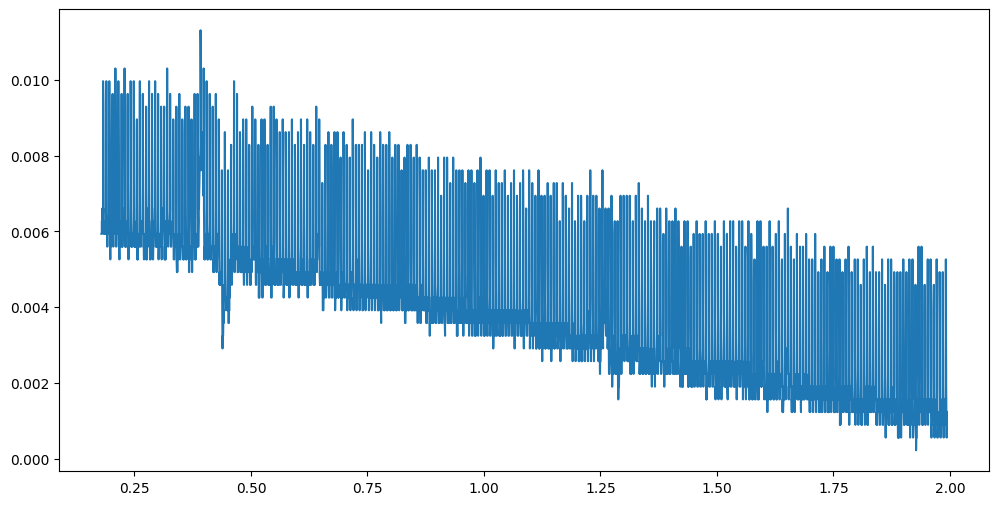

In [8]:
correnti_inverse_data = describe_data("dati/correnti_inverse.csv")

### 1.2 Corrente oscura

Final data: 6781
Is sorted: True
(0.0119194246746483, 0.0052626097802009) (1.993206997936853, 0.0012372307482065)


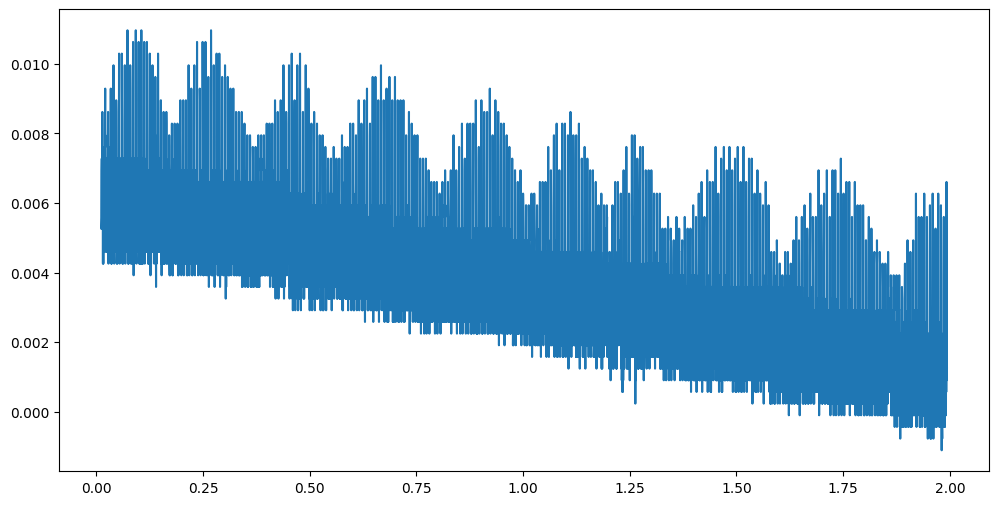

In [9]:
# Carico i dati della curva I/V della corrente oscura
corrente_oscura_data = describe_data("dati/corrente_oscura.csv")

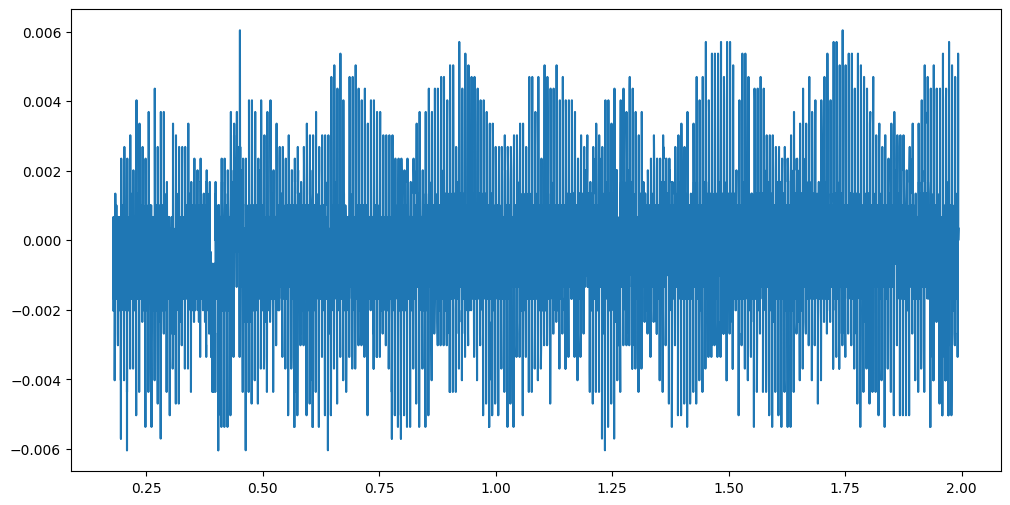

In [10]:
# sovrappongo il grafico con quello della corrente inversa sottraendo la corrente inversa
corrente_oscura_data_scaled = overlap_series(corrente_oscura_data, correnti_inverse_data)

_ = plot_tuple_list(corrente_oscura_data_scaled)

### 1.3 Giallo

Final data: 6779
Is sorted: True
(0.012588778584534, 0.5121249195588409) (1.993541674891795, -0.0024527000311217)


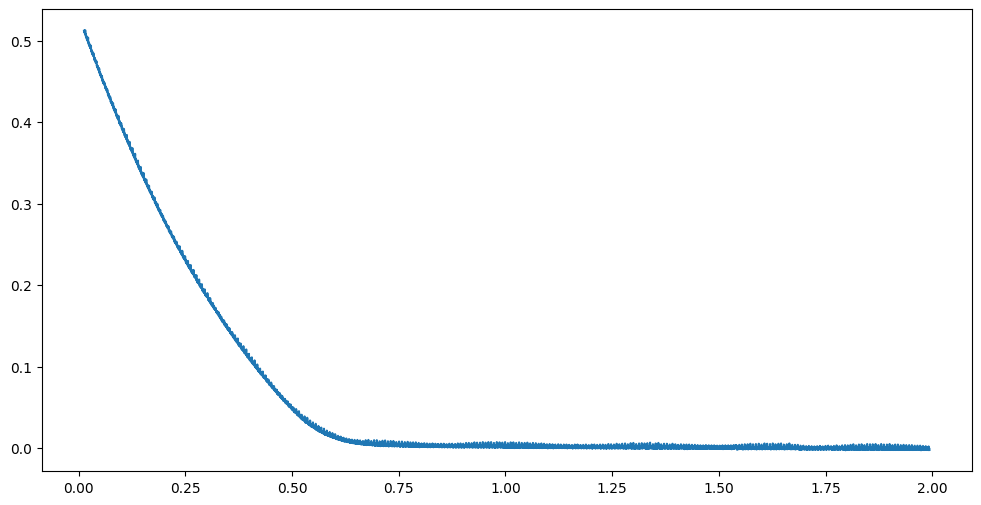

In [11]:
# Carico i dati delle curve I/V per i filtri di colore giallo, verde, verde acqua, blu 
giallo_data = describe_data("dati/giallo.csv")

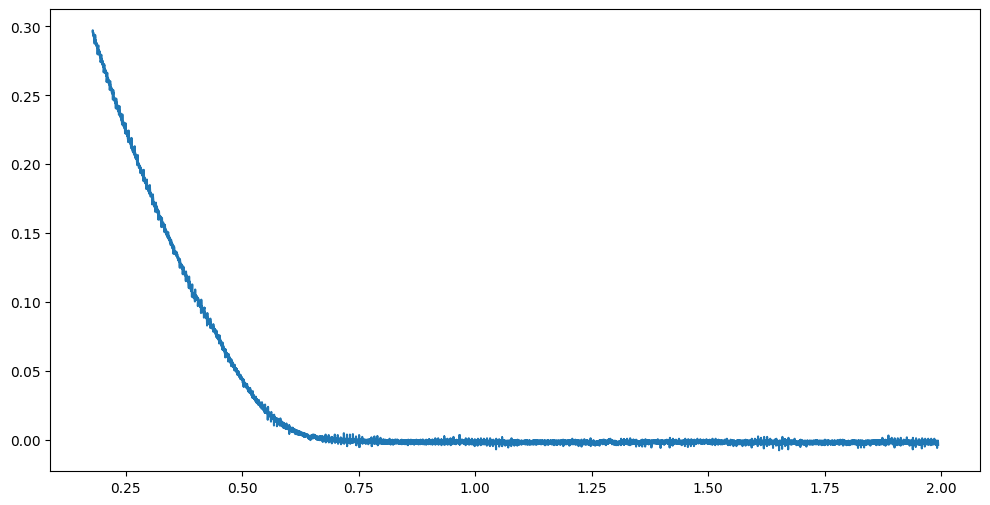

In [12]:
# sovrappongo il grafico con quello della corrente inversa sottraendo la corrente inversa
giallo_data_scaled = overlap_series(giallo_data, correnti_inverse_data)

_ = plot_tuple_list(giallo_data_scaled)

### 1.4 Verde

Final data: 6783
Is sorted: True
(0.0112500707647624, 0.588271672914069) (1.993541674891795, 0.0002308859902079)


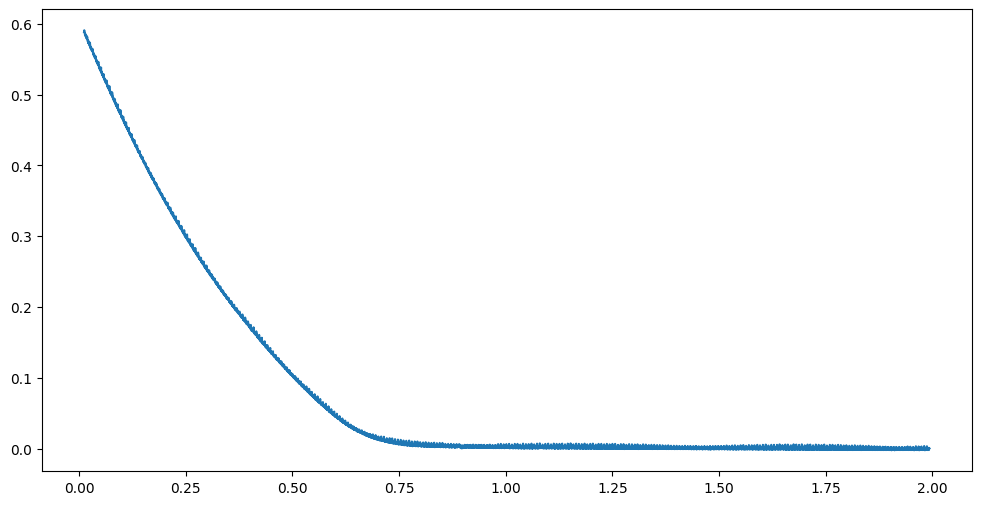

In [13]:
# Carico i dati delle curve I/V per i filtri di colore giallo, verde, verde acqua, blu 
verde_data = describe_data("dati/verde.csv")

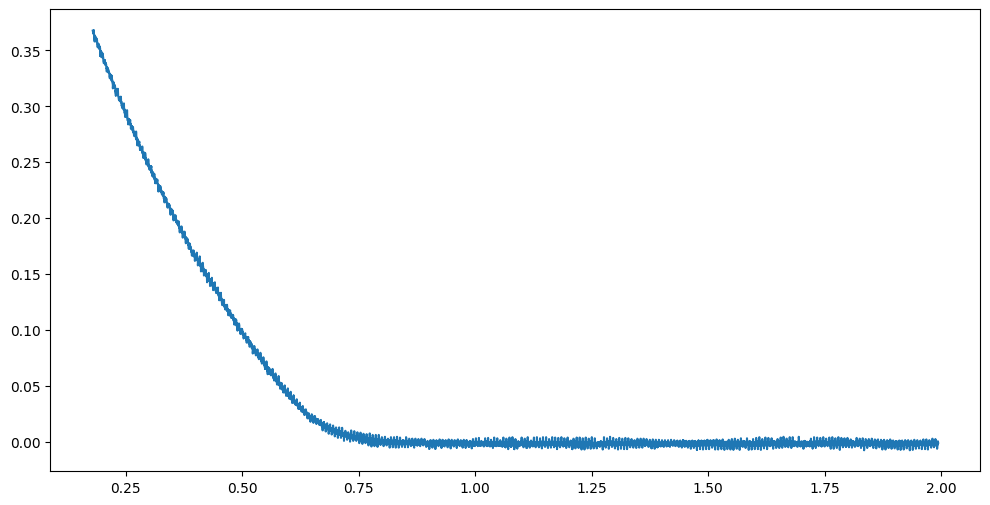

In [14]:
# sovrappongo il grafico con quello della corrente inversa sottraendo la corrente inversa
verde_data_scaled = overlap_series(verde_data, correnti_inverse_data)

_ = plot_tuple_list(verde_data_scaled)

### 1.5 Verde-Acqua

Final data: 6779
Is sorted: True
(0.012588778584534, 0.5792145700920805) (1.993206997936853, -0.0027881482837879)


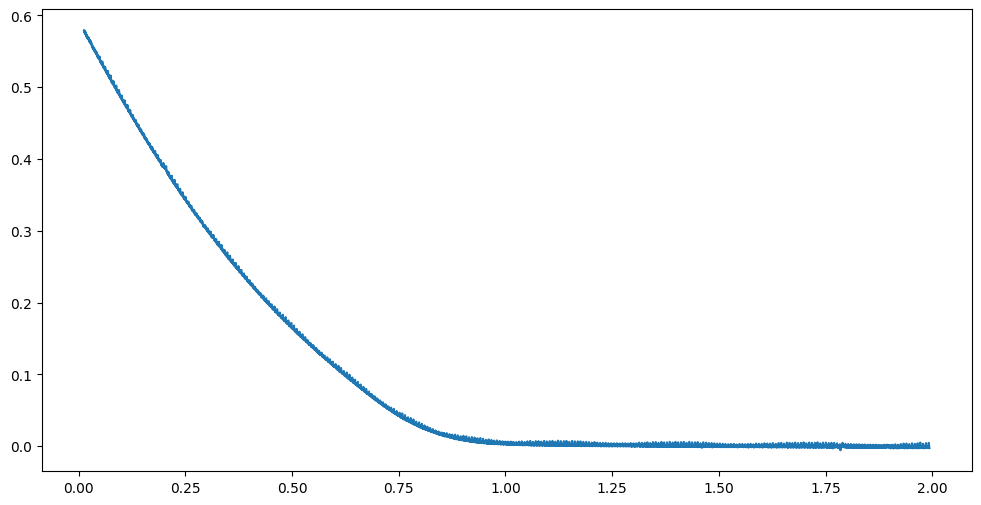

In [15]:
# Carico i dati delle curve I/V per i filtri di colore giallo, verde, verde acqua, blu 
verdeacqua_data = describe_data("dati/verdeacqua.csv")

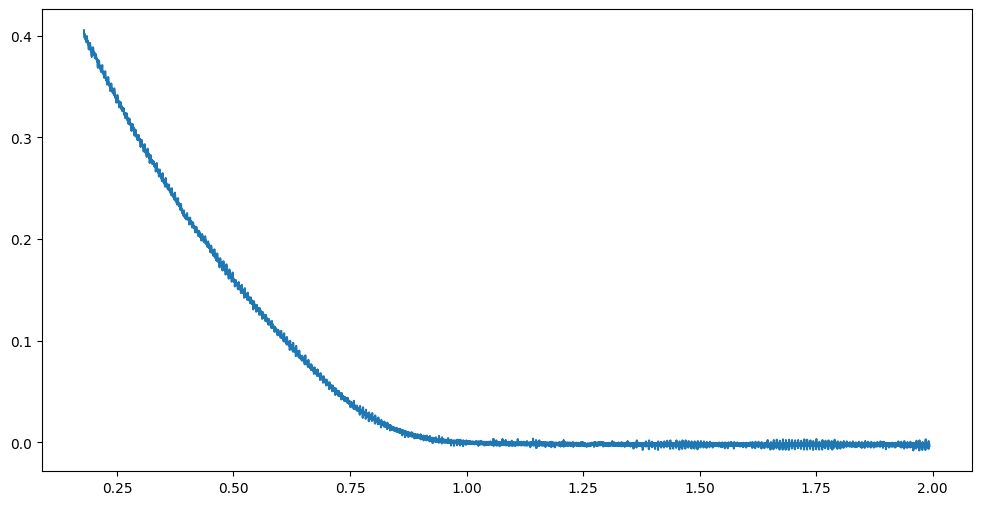

In [16]:
# sovrappongo il grafico con quello della corrente inversa sottraendo la corrente inversa
verdeacqua_data_scaled = overlap_series(verdeacqua_data, correnti_inverse_data)

_ = plot_tuple_list(verdeacqua_data_scaled)

### 1.6 Blu

Final data: 6779
Is sorted: True
(0.012588778584534, 0.771761867122485) (1.993206997936853, -0.0024527000311217)


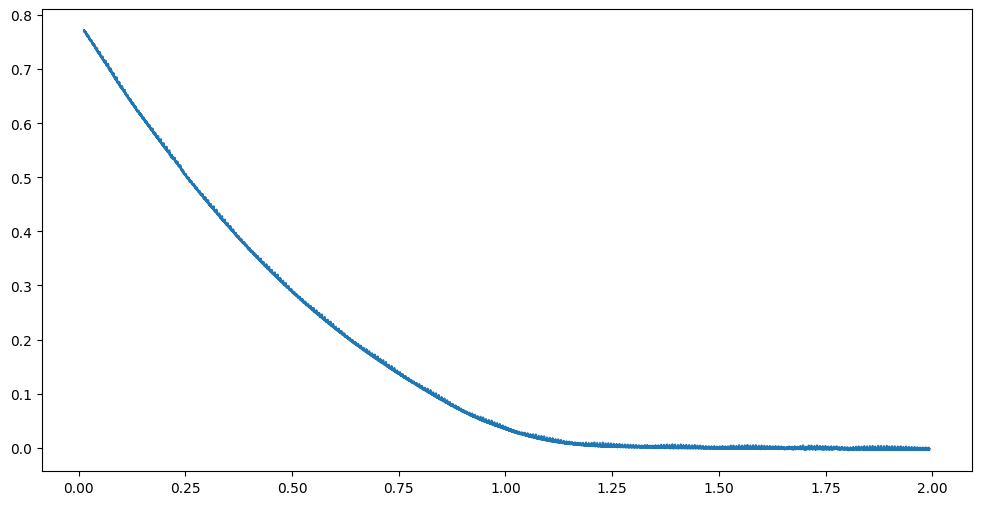

In [17]:
# Carico i dati delle curve I/V per i filtri di colore giallo, verde, verde acqua, blu 
blu_data = describe_data("dati/blu.csv")

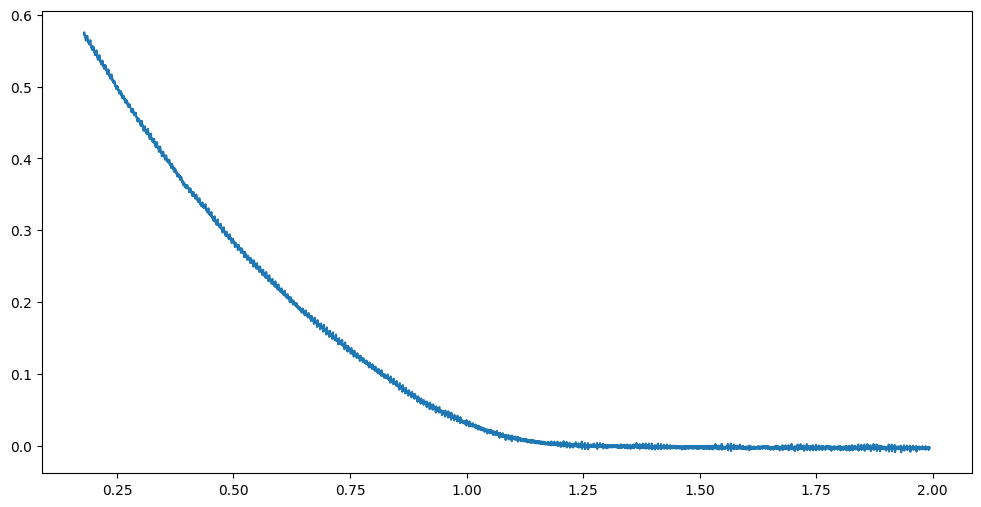

In [18]:
# sovrappongo il grafico con quello della corrente inversa sottraendo la corrente inversa
blu_data_scaled = overlap_series(blu_data, correnti_inverse_data)

_ = plot_tuple_list(blu_data_scaled)

### 1.7 Altri grafici

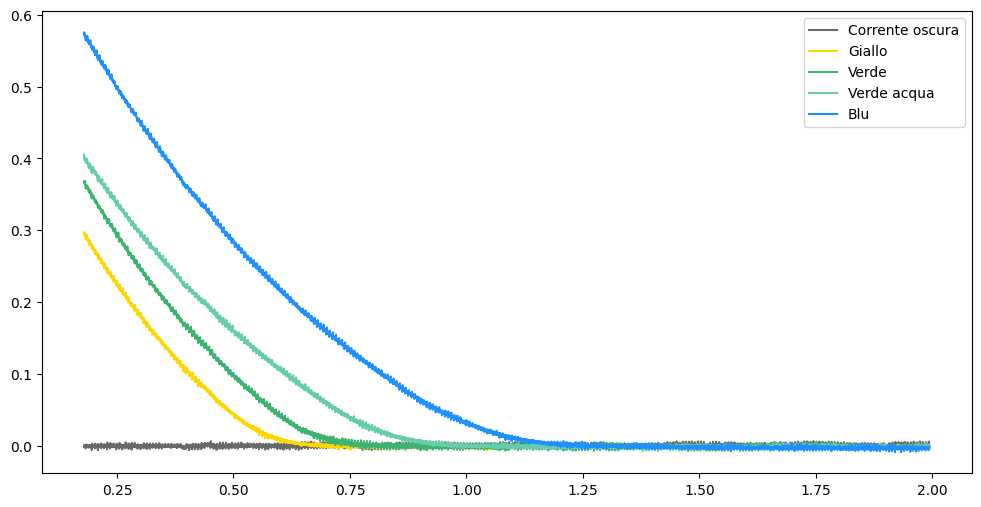

In [19]:
plot_tuple_list(corrente_oscura_data_scaled, color="dimgrey")
plot_tuple_list(giallo_data_scaled, color="gold")
plot_tuple_list(verde_data_scaled, color="mediumseagreen")
plot_tuple_list(verdeacqua_data_scaled, color="mediumaquamarine")
plot_tuple_list(blu_data_scaled, color="dodgerblue")

plt.legend(["Corrente oscura", "Giallo", "Verde", "Verde acqua", "Blu"])

# 2. Verifica dell'andamento della corrente oscura
##### Mi aspetto che la fotocorrente in assenza di illuminazione sia puramente ohmica. Questo significa che l'andamento dovrebbe risultare di proporzionalità diretta (lineare e con offset nullo)

### 2.1 Funzione di interpolazione

In [20]:
def line(x, b, I0):
    return b*x + I0

### 2.2 Interpolazione dei dati

In [21]:
_x = [i[0] for i in corrente_oscura_data_scaled]
_y = [i[1] for i in corrente_oscura_data_scaled]
popt, pcov = curve_fit(line,_x,_y)

corrente_oscura_b = popt[0]
corrente_oscura_I0 = popt[1]

# 3. Stima preliminare della tensione di azzeramento della fotocorrente $V_0$

### 3.1 Giallo

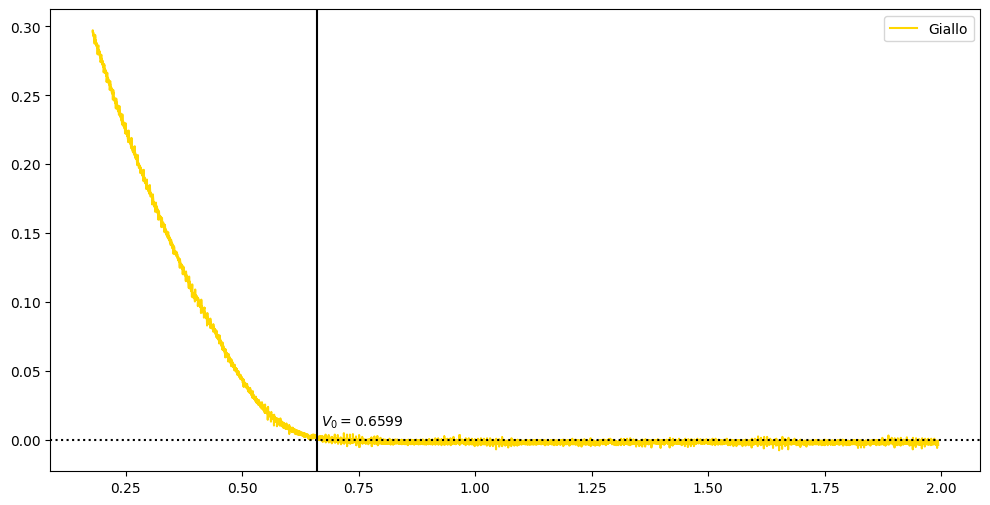

In [22]:
intercept_giallo = plot_tuple_list_with_y_intercept(giallo_data_scaled,color="gold")
plt.annotate(f"$V_0 = {intercept_giallo[0]:.4f}$", xy=intercept_giallo, xytext=(intercept_giallo[0]+0.01,intercept_giallo[1]+0.01))
plt.legend(["Giallo"])

### 3.2 Verde

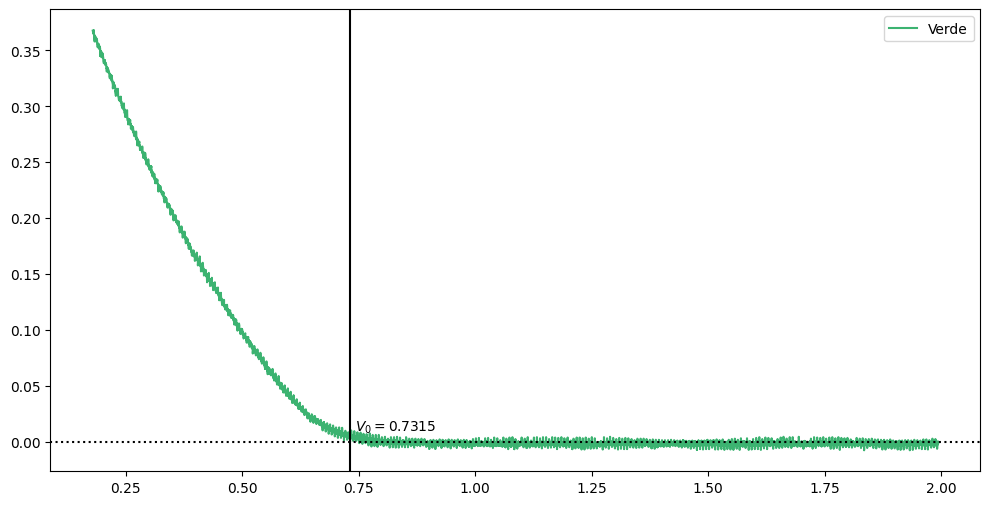

In [23]:
intercept_verde = plot_tuple_list_with_y_intercept(verde_data_scaled,color="mediumseagreen")
plt.annotate(f"$V_0 = {intercept_verde[0]:.4f}$", xy=intercept_verde, xytext=(intercept_verde[0]+0.01,intercept_verde[1]+0.01))
plt.legend(["Verde"])

### 3.3 Verde acqua

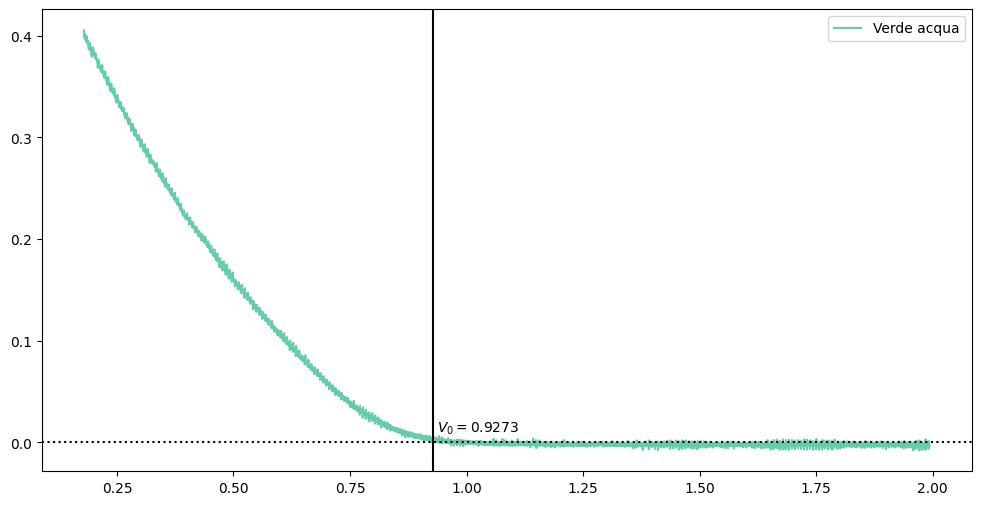

In [24]:
intercept_verdeacqua = plot_tuple_list_with_y_intercept(verdeacqua_data_scaled,color="mediumaquamarine")
plt.annotate(f"$V_0 = {intercept_verdeacqua[0]:.4f}$", xy=intercept_verdeacqua, xytext=(intercept_verdeacqua[0]+0.01,intercept_verdeacqua[1]+0.01))
plt.legend(["Verde acqua"])

### 3.4 Blu

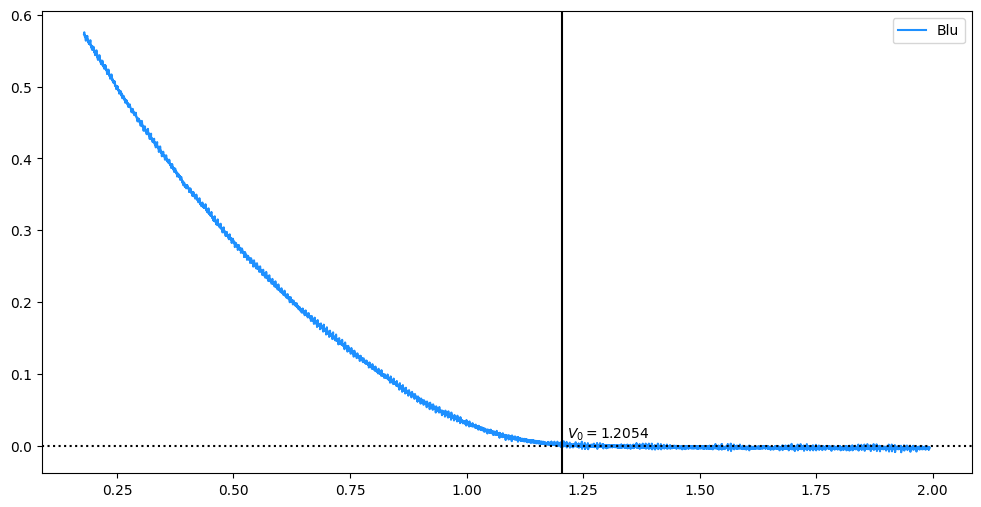

In [25]:
intercept_blu = plot_tuple_list_with_y_intercept(blu_data_scaled,color="dodgerblue")
plt.annotate(f"$V_0 = {intercept_blu[0]:.4f}$", xy=intercept_blu, xytext=(intercept_blu[0]+0.01,intercept_blu[1]+0.01))
plt.legend(["Blu"])

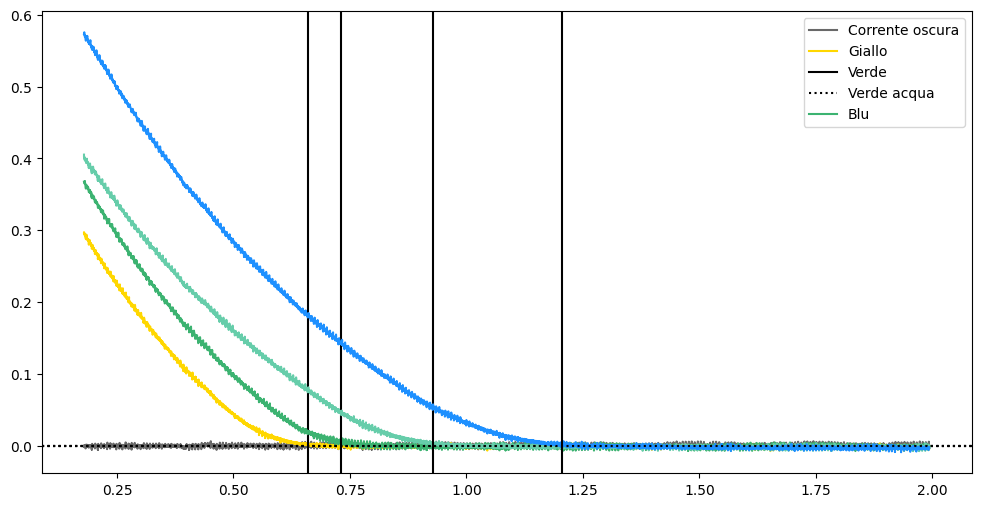

In [26]:
plot_tuple_list(corrente_oscura_data_scaled, color="dimgrey")
plot_tuple_list_with_y_intercept(giallo_data_scaled, color="gold")
plot_tuple_list_with_y_intercept(verde_data_scaled, color="mediumseagreen")
plot_tuple_list_with_y_intercept(verdeacqua_data_scaled, color="mediumaquamarine")
plot_tuple_list_with_y_intercept(blu_data_scaled, color="dodgerblue")

plt.legend(["Corrente oscura", "Giallo", "Verde", "Verde acqua", "Blu"])

# 3. Stima della tensione di azzeramento della fotocorrente $V_0$ con fit

### 3.1 Funzione di interpolazione
$$I(V) = a(V_0 - V)^\alpha \Theta(V_0-V)+bV+I_0$$

In [27]:

def fn(V,a,V0,alpha,b,I0):
    return a * ((V0-V)**alpha) * np.where(V0>V,1,0) + b*V + I0

def fit_fn(V, V0, a):
    return fn(V, a, V0, 2.5, corrente_oscura_b, corrente_oscura_I0)

### 3.2 Interpolazione dei dati

[1. 1.]
[[inf inf]
 [inf inf]]


/var/folders/b0/nnhjkfzn507dy1cgm6pxp1th0000gn/T/ipykernel_11848/4250721556.py:2: RuntimeWarning: invalid value encountered in power
  return a * ((V0-V)**alpha) * np.where(V0>V,1,0) + b*V + I0
/Users/atancredi/.pyenv/versions/3.10.6/envs/physics/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


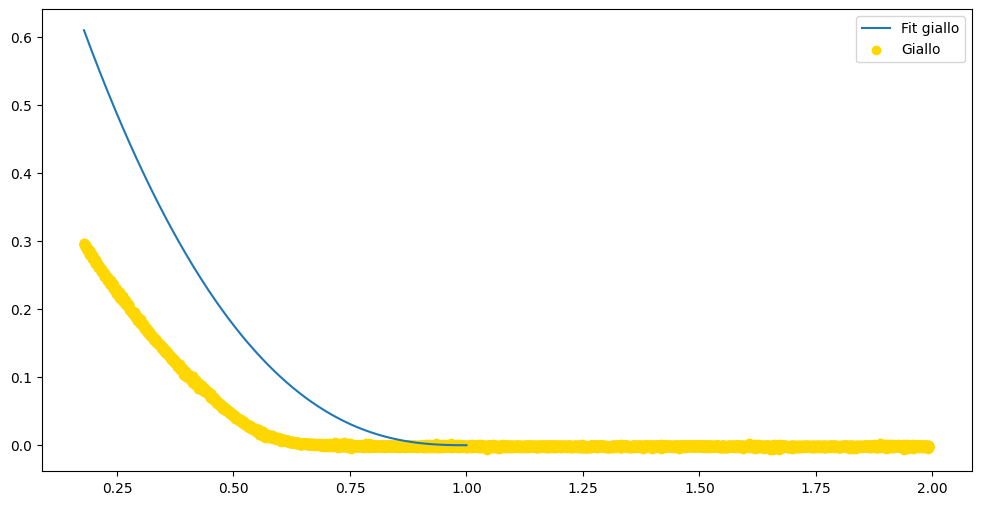

In [28]:
# Giallo
_x = [i[0] for i in giallo_data_scaled]
_y = [i[1] for i in giallo_data_scaled]
popt, pcov = curve_fit(fit_fn,_x,_y)
print(popt)
print(pcov)

# Define linspace
_x_lin = np.linspace(min(_x), max(_x), len(_x)*10)

# Plot
plt.plot(_x_lin, fit_fn(_x_lin, *popt), label="Fit giallo")
plt.scatter(_x, _y, label="Giallo", color="gold")
plt.legend()
